# Plotting Pair Plots

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
sns.set(style="darkgrid", context="notebook")
%matplotlib inline

In [2]:
iris_data=load_iris()
X=iris_data.data
y=iris_data.target
df=pd.DataFrame(X, columns=iris_data.feature_names)
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df["target"]=y

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


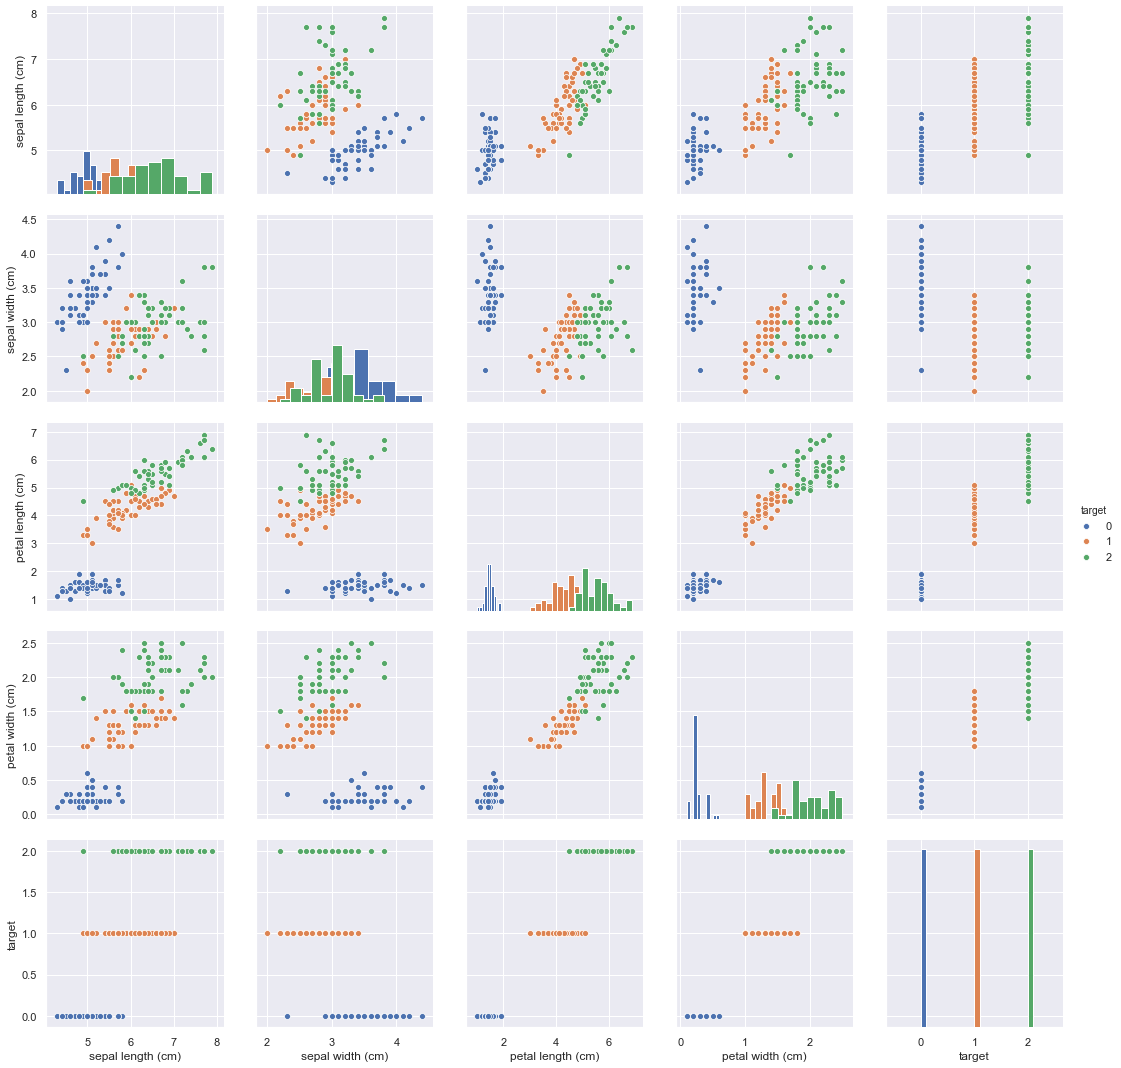

In [5]:
sns.pairplot(df, hue="target", size=3, diag_kind="hist")

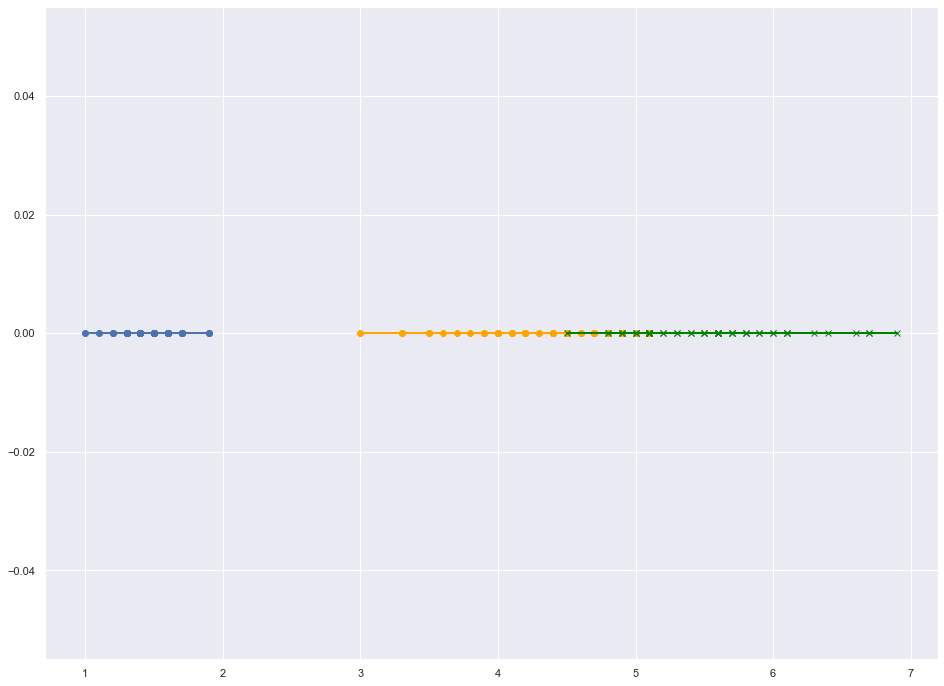

In [6]:
iris_setosa=df.loc[df["target"]==0]
iris_virginica=df.loc[df["target"]==1]
iris_versicolor=df.loc[df["target"]==2]
plt.figure(figsize=(16, 12))
plt.plot(iris_setosa["petal length (cm)"], np.zeros_like(iris_setosa["petal length (cm)"]), marker="o")
plt.plot(iris_virginica["petal length (cm)"], np.zeros_like(iris_virginica["petal length (cm)"]), color="orange", marker="8")
plt.plot(iris_versicolor["petal length (cm)"], np.zeros_like(iris_versicolor["petal length (cm)"]), color="green", marker="x")

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x864 with 0 Axes>

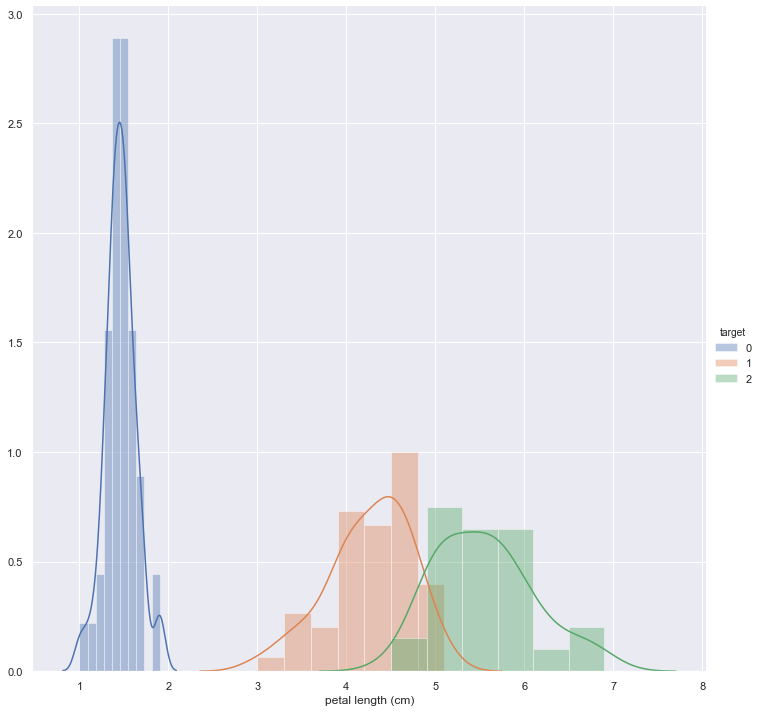

In [7]:
plt.figure(figsize=(16, 12))
sns.FacetGrid(df, hue="target", size=10).map(sns.distplot, "petal length (cm)").add_legend()

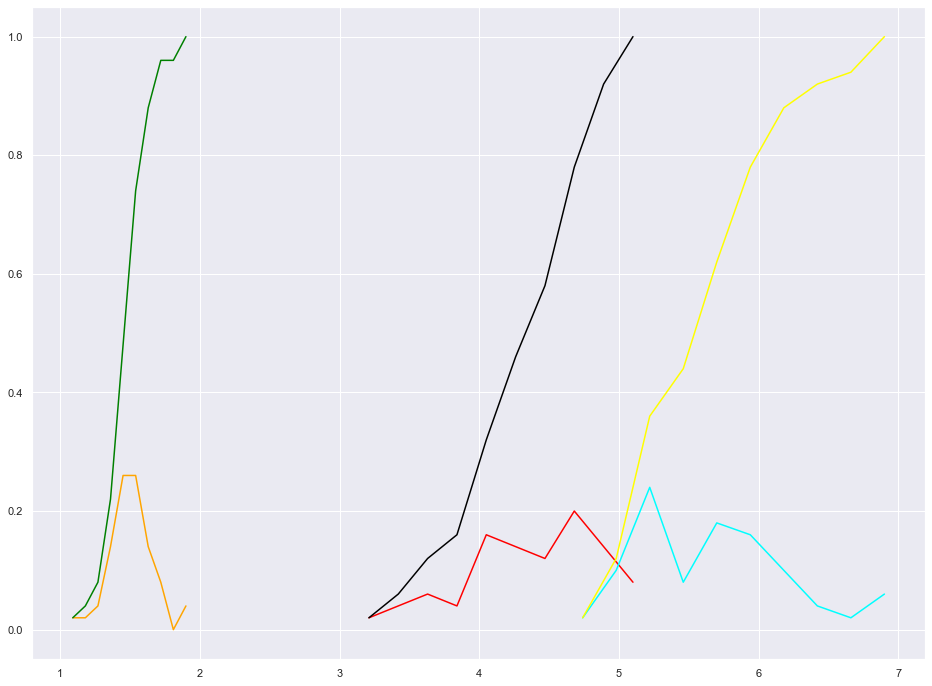

In [8]:
counts1, bin_edges1=np.histogram(iris_setosa["petal length (cm)"], bins=10, density=True)
counts2, bin_edges2=np.histogram(iris_virginica["petal length (cm)"], bins=10, density=True)
counts3, bin_edges3=np.histogram(iris_versicolor["petal length (cm)"], bins=10, density=True)

pdf1=counts1/sum(counts1)
pdf2=counts2/sum(counts2)
pdf3=counts3/sum(counts3)

cdf1=np.cumsum(pdf1)
cdf2=np.cumsum(pdf2)
cdf3=np.cumsum(pdf3)
plt.figure(figsize=(16, 12))
plt.plot(bin_edges1[1:], pdf1, color="orange")
plt.plot(bin_edges1[1:], cdf1, color="green")
plt.plot(bin_edges2[1:], pdf2, color="red")
plt.plot(bin_edges2[1:], cdf2, color="black")
plt.plot(bin_edges3[1:], pdf3, color="cyan")
plt.plot(bin_edges3[1:], cdf3, color="yellow")


In [9]:
from sklearn.datasets import load_boston
housing=load_boston()
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df["MEDV"]=housing.target
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 1152x864 with 0 Axes>

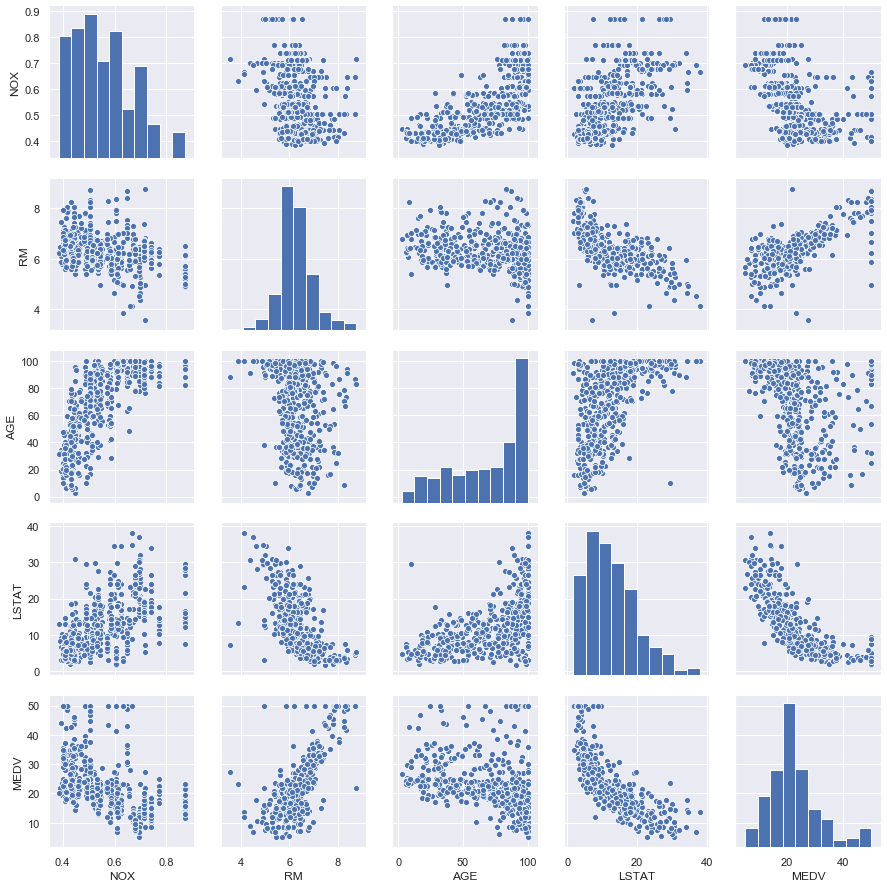

In [11]:
plt.figure(figsize=(16, 12))
sns.pairplot(df[["NOX", "RM", "AGE", "LSTAT", "MEDV"]])

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


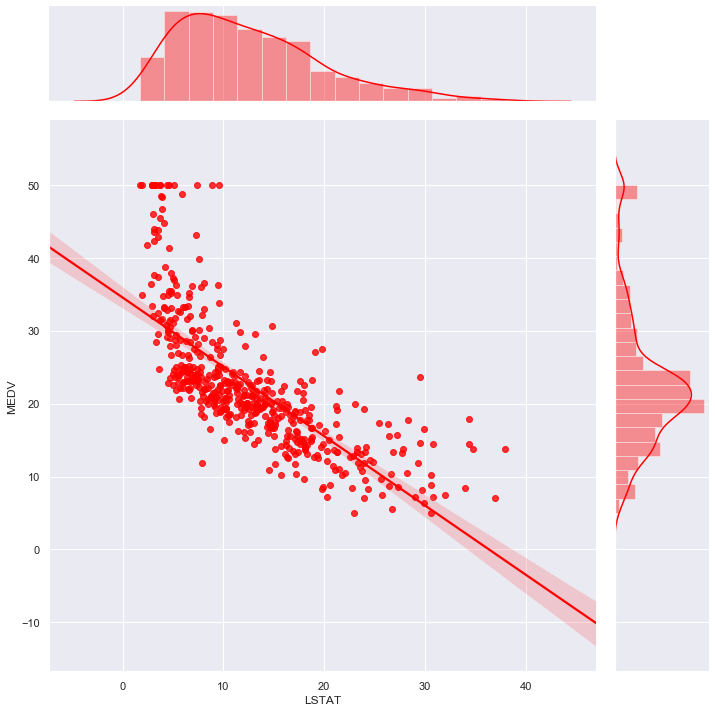

In [12]:

sns.jointplot(x=df["LSTAT"], y=df["MEDV"], kind="reg", color="red", size=10)

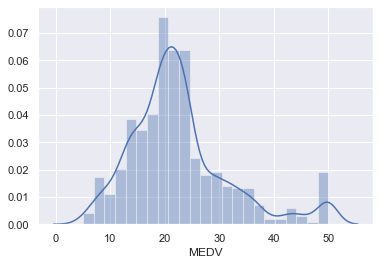

In [13]:
sns.distplot(df["MEDV"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201BCC73518>],
      dtype=object)

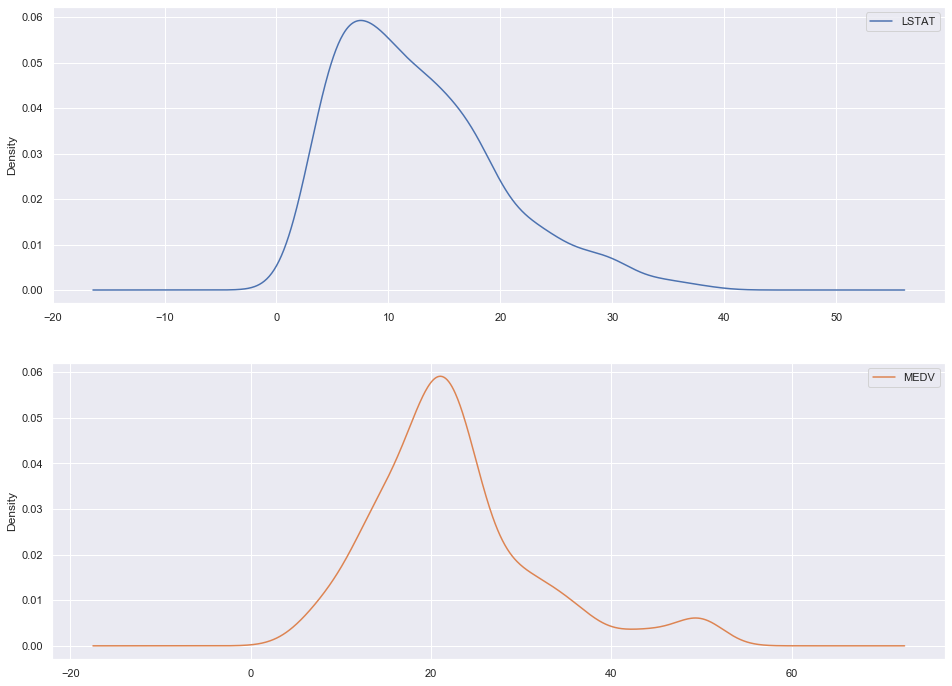

In [14]:
df[["LSTAT", "MEDV"]].plot(kind="density", subplots=True, layout=(2, 1), sharex=False, figsize=(16, 12))

In [15]:
iris_data=load_iris()
df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["iris"]=iris_data.target

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


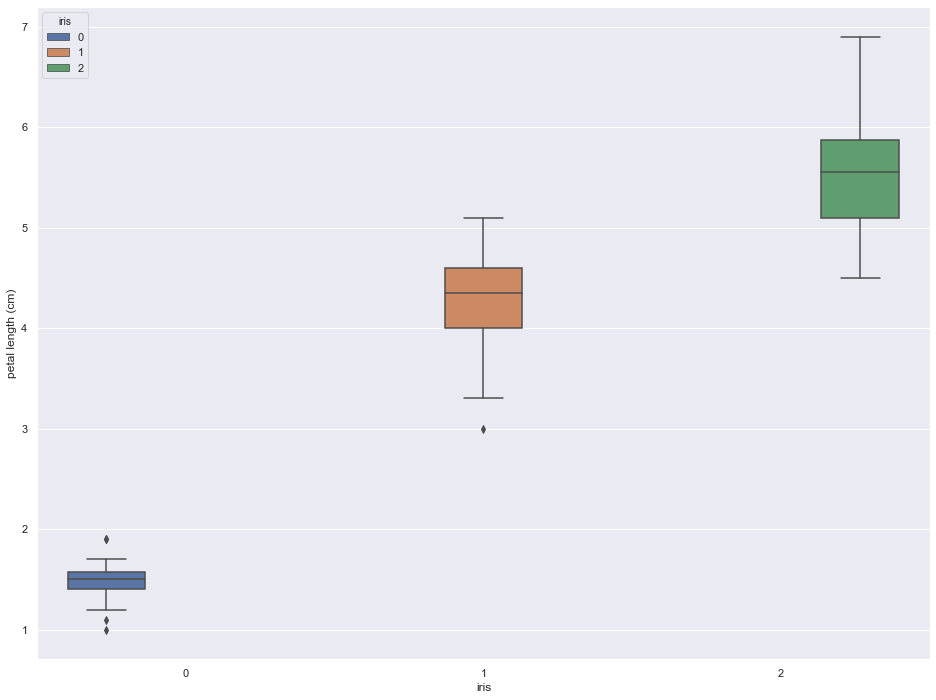

In [17]:
classes=np.unique(df["iris"].values)
plt.figure(figsize=(16, 12))
sns.boxplot(x="iris", y="petal length (cm)", data=df, hue="iris")

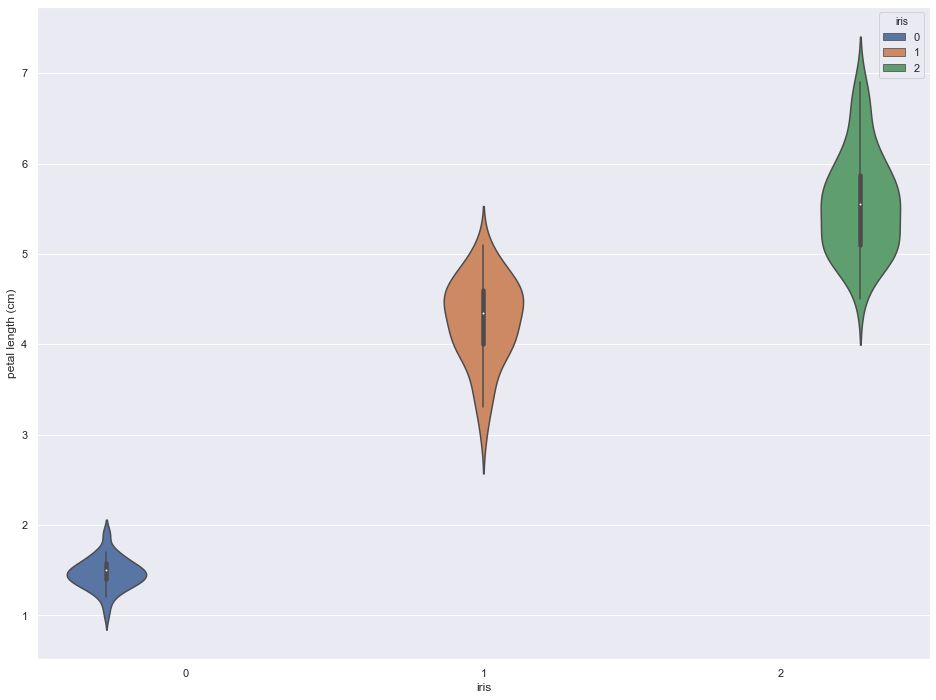

In [18]:
plt.figure(figsize=(16, 12))
sns.violinplot(x="iris", y="petal length (cm)", data=df, hue="iris")

<Figure size 1152x864 with 0 Axes>

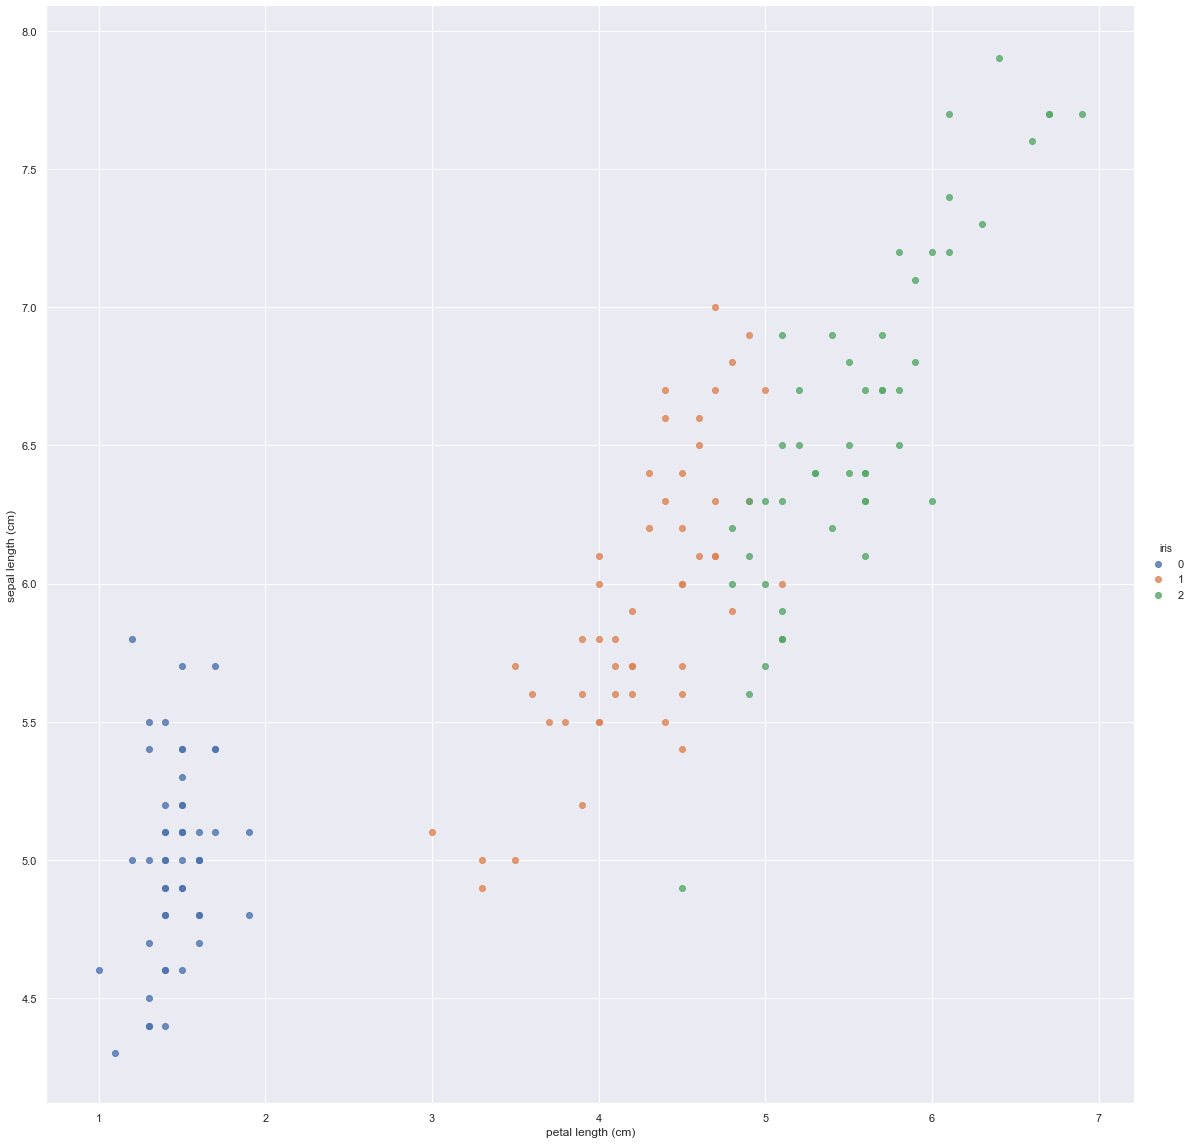

In [27]:
plt.figure(figsize=(16, 12))
sns.lmplot(x='petal length (cm)', y='sepal length (cm)', data=df, hue="iris", size=16, fit_reg=False)


C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


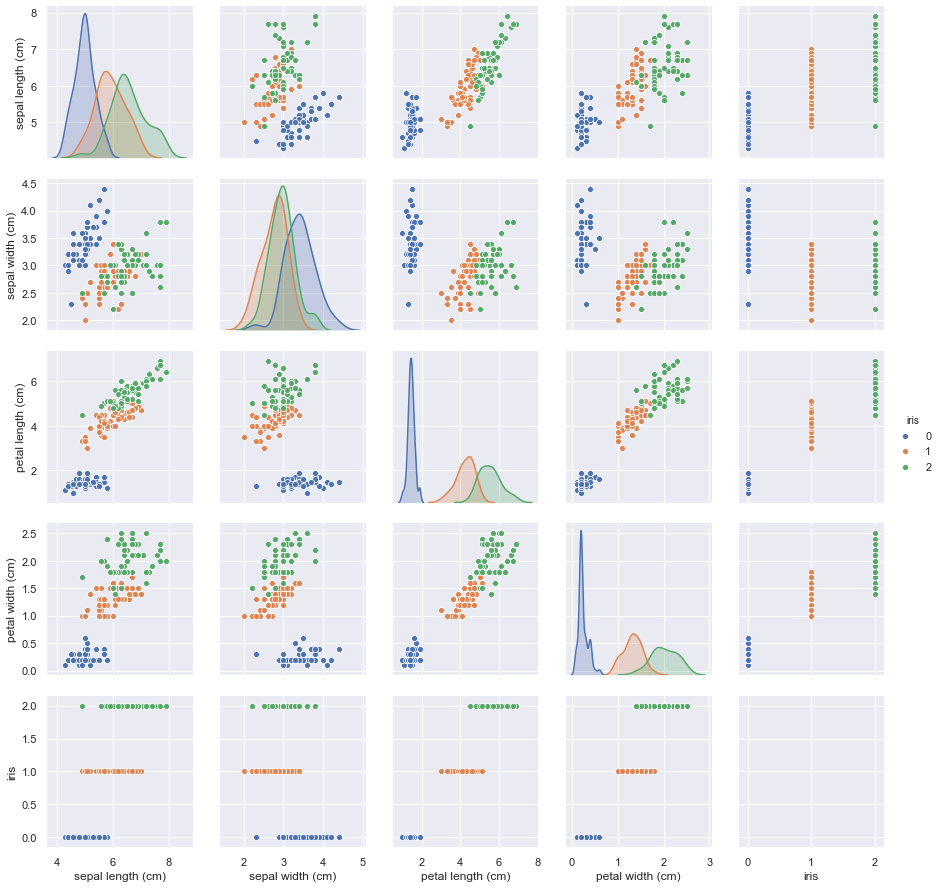

In [29]:
sns.pairplot(df, hue='iris')

In [ ]:

sns.lmplot(x='petal length (cm)', y='sepal length (cm)', data=df, hue="iris", fit_reg=False, size=10, logistic=True)
sns.lmplot(x='petal width (cm)', y='sepal width (cm)', data=df, hue="iris", fit_reg=False, size=10, logistic=True)
